In [3]:
from tools import load_conf, save_conf
stores_data = load_conf('conf/all_stores.json')

In [2]:
stores_data['7290875100001_001_002']

{'ProviderName': 'bareket',
 'ChainID': '7290875100001',
 'SubChainID': '001',
 'StoreID': '002',
 'BikoretNo': None,
 'StoreType': '1',
 'StoreName': '2 יהוד',
 'Address': 'התעשייה 29',
 'City': 'יהוד',
 'ZipCode': '5621807',
 'LastUpdateDate': '31/07/2022 16:23:32'}

In [83]:
import codecs

def clean_city_name(city_name):
    if not city_name:
        return 'None'
    return city_name.replace('-',' ')
city_stat = {}

city_name_correction = load_conf('conf/city_name_correction.json')
city_name_correction.update({
    'קניון מבשרת':
        'מחלף הראל'
    })
save_conf('conf/city_name_correction.json', city_name_correction)

for key in stores_data:
    city_name_temp = stores_data[key]['City']
    city_name_temp = clean_city_name(city_name_temp)
    city_name = city_name_correction.get(city_name_temp, city_name_temp)
    city_stat[city_name] = city_stat.get(city_name, 0) + 1
city_stat_sorter = sorted(city_stat.items(), key=lambda x:x[1])

city_stat_sorter

[('כוכב יעקב', 1),
 ('קיבוץ יסעור', 1),
 ('בית קשת', 1),
 ('להבות חביבה', 1),
 ('גשר הזיו', 1),
 ('אלומות', 1),
 ('אורים', 1),
 ('כפר עזה', 1),
 ('עינת', 1),
 ('צומת הגומא', 1),
 ('צפונה מצומת מגידו', 1),
 ('קיבוץ גשר', 1),
 ('קיבוץ כפר הנשיא', 1),
 ('מושב בית יהושע', 1),
 ('קיבוץ דגניה', 1),
 ('קיבוץ העוגן', 1),
 ('קיבוץ מעוז חיים', 1),
 ('קיבוץ בית זרע', 1),
 ('מושב שדי חמד', 1),
 ('לכיש (מושב)', 1),
 ('קיבוץ גבעת השלושה', 1),
 ('מושב אחיטוב', 1),
 ('מושב מכמורת', 1),
 ('מושב ישרש', 1),
 ('קיבוץ ברור חיל', 1),
 ('מושב נהלל', 1),
 ('קיבוץ גונן', 1),
 ('מושב נורדיה', 1),
 ('מושב גבע כרמל', 1),
 ('מושב מגשים', 1),
 ('קיבוץ גן שמואל', 1),
 ('האון', 1),
 ('צוקים', 1),
 ('צומת קרית אתא', 1),
 ('מתחם מול כינרת צמח', 1),
 ('בית הכרם', 1),
 ('ציפורית', 1),
 ('ניר בנים', 1),
 ('צומת חנניה', 1),
 ('עמיעד', 1),
 ('יזרעאל', 1),
 ('קיבוץ מזרע', 1),
 ('נהורה', 1),
 ('נווה מונסון', 1),
 ('צומת מסובים', 1),
 ('יד נתן', 1),
 ('נגבה', 1),
 ('משען', 1),
 ('גבים', 1),
 ('נתב"ג', 1),
 ('עין איילה', 1),
 (

In [5]:
city_stat_keys = [key for key in city_stat.keys()]
city_stat_keys.sort()
#city_stat_keys

with codecs.open('conf/city_names.csv', encoding='utf-8', errors="ignore") as store_file:
    lines = store_file.readlines()
csv = [line.split(',')[1].replace('-',' ').replace('*','') for line in lines]
unknown = [name for name in city_stat_keys if not name in csv]
unknown

['G  יוקנעם (מגרש רדימיקס)',
 'None',
 'unknown',
 'אאוטלט גן שמואל',
 'אלנקווה',
 'אשדות יעקב',
 'באקה גל גרביה',
 'בית הכרם',
 'בנימינה',
 'בקעת הירדן',
 'גבעת אולגה',
 'גבעת טל',
 'גבעת סביון',
 'גבעת עדה',
 'גורדון',
 'גוש עציון',
 'גן הצפון',
 'גני חוגה',
 'גרנות הגליל',
 'גש (גוש חלב)',
 'דבוריה',
 'דיר חנא',
 'דליית אל כרמל',
 'דלית אל כרמל',
 'הרצליה פיתוח',
 'חוצות אשקלון',
 'טבעון',
 'יוקנעם עילית',
 'יקנעם',
 'כביש 5714  בחן',
 'כביש 6',
 'כפר טורמן',
 'כפר ירכא',
 'כרכור',
 'לב השרון',
 'לטרון',
 'ליד קיבוץ מגל',
 'מגד אל כרום',
 'מושב אחיטוב',
 'מושב בית חרות',
 'מושב בית יהושוע',
 'מושב גבע כרמל',
 'מושב טל שחר',
 'מושב ישרש',
 'מושב לכיש',
 'מושב מגשים',
 'מושב מכמורת',
 'מושב נהלל',
 'מושב נווה ירק',
 'מושב נורדיה',
 'מושב שדי חמד',
 'מחלף יבנה',
 'מישור אדומים',
 'מיתרים',
 'מכבים',
 'מעאר',
 'מעלות',
 'מפרץ חיפה',
 'מצפה אביב',
 'מתחם מול כינרת צמח',
 'נהריה',
 'נווה מונסון',
 'נחלת יהודה',
 'נצרת עילית',
 'נצרת עילית    נוף הגליל',
 'נצרת עלית',
 'נשר (שע 0512)',
 'נ

In [24]:
import re
import codecs
from geopy.geocoders import ArcGIS
import time
import os
import googlemaps
from tools import load_conf, save_conf
from pprint import pprint

def parse_city_in_geonames(city, city_location):
    response = requests.request("GET", f"https://www.geonames.org/search.html?q={city}&country=IL")
    content = response.text
    all_td_nowrap = re.findall("<td nowrap>([^<]*)</td>", content)
    if len(all_td_nowrap)<2:
        return None
    (lag_str, lat_str) = (all_td_nowrap[0],all_td_nowrap[1])
    geolocator = ArcGIS()
    result = geolocator.reverse(lag_str + ' ' + lat_str)

    lag_str + ' ' + lat_str

    city_location[city] = (result.latitude, result.longitude)
    save_conf('conf/city_location.json', city_location)
    return (result.latitude, result.longitude)

def parse_city_by_wiki(city, city_location, short_city=None):
    if short_city:
        response = requests.request("GET", f"https://he.wikipedia.org/wiki/{short_city}")
        diff = city.replace(short_city, '')
        if not diff in response.text:
            print(f'diff not in text {diff}')
            return None
    else:
        response = requests.request("GET", f"https://he.wikipedia.org/wiki/{city}")
    content = response.text
    lat_col = re.findall('class="latitude">([^<]*)</span>', content)
    if not lat_col:
        return None
    #print(lat_col[0])
    lon_col = re.findall('class="longitude">([^<]*)</span>', content)
    #print(lon_col[0])
    
    geolocator = ArcGIS()
    result = geolocator.reverse(lat_col[0] + ' ' + lon_col[0])
    print(result)
    #print((result.latitude, result.longitude))
    
    city_location[city] = (result.latitude, result.longitude)
    save_conf('conf/city_location.json', city_location)
    return (result.latitude, result.longitude)   

def parse_city_stat():
    unkown = []
    for city in [key for key in city_stat]:
        short_city = None
        if 'קיבוץ ' in city:
            short_city = city.replace('קיבוץ ', '')
        if 'מושב ' in city:
            short_city = city.replace('מושב ', '')
        if 'כפר ' in city:
            short_city = city.replace('כפר ', '')
        city_location = load_conf('conf/city_location.json')
        if city in city_location:
            continue
        location = parse_city_by_wiki(city, city_location,  short_city)
        if not location:
            location = parse_city_in_geonames(city, city_location)
            if not location:
                unkown.append(city)
        print (location,city)
    print('unkown', len(unkown))
    print('known', len(city_location))

city_location = load_conf('conf/city_location.json')
stores_data = load_conf('conf/all_stores.json')
count = 0
geolocator = ArcGIS()
#os.environ['GOOGLE_API_KEY'] = '' #https://console.cloud.google.com/
GOOGLE_API_KEY = os.getenv('GOOGLE_API_KEY')
#print(GOOGLE_API_KEY)
gmaps = googlemaps.Client(key=GOOGLE_API_KEY)

poisoned_store = ['7290172900007_100_143']
store_geo = load_conf('conf/store_geo.json')
store_unkown_geo = set()
print(len(stores_data))
print(len(store_unkown_geo))
print(len(store_geo))
for key in stores_data:
    if key in store_geo:
        continue
    if key in store_unkown_geo:
        continue
    if key in poisoned_store:
        print(f'key poisoned : {key}')
        continue

    count += 1
    store = stores_data[key]
    #print(key)
    store_address = store['Address']
    store_city = store['City']
    if store_address and'co.il' in store_address.lower():
        print(f'Ignoring online {key}')
        continue
    if not store_address or not store_city:
        print(f'Ignoring {key} {store_address},{store_city}')
        continue
    if store_address == store_city or not store_address or store_address=='unknown':
        if store_city=='unknown':
            print(f'Ignoring {key}')
            continue
        full_address =f"{store_city}, ישראל"
    else:
        full_address =f"{store_address}, {store_city}, ישראל"

    result = geolocator.geocode(full_address)
    #print(dir(result))
    if result and store_address in result.address and result.latitude and result.longitude and ',' in result.address:
        print((result.address, result.latitude, result.longitude, key))
        store_geo[key] = (result.latitude, result.longitude)
        save_conf('conf/store_geo.json', store_geo)
    else:
        try:
            geocode_result = gmaps.geocode(full_address)
        except:
            print(f'Failed on address {full_address}, key {key}')
            raise
        #print(dir(geocode_result))
        #pprint(geocode_result)
        if geocode_result and 'geometry' in geocode_result[0] and 'location' in geocode_result[0]['geometry']:
            geocode_location = geocode_result[0]['geometry']['location']
            print(geocode_result[0]['formatted_address'], full_address, geocode_location)
            store_geo[key] = (geocode_location['lat'], geocode_location['lng'])
            save_conf('conf/store_geo.json', store_geo)
        else:
            print(full_address, key)
            store_unkown_geo.add(key)
    time.sleep(2)
    #if count>3:
    #    break
    '''
    import inspect
    lines = inspect.getsource(geolocator.geocode)
    print(lines)
    '''

1967
0
1876
Ignoring 7290875100001_001_065  ,None
Ignoring 7290875100001_001_090  ,None
Ignoring online 7290725900003_1_9032
Ignoring 7290725900003_1_9061
Ignoring 7290725900003_1_9062
Ignoring 7290725900003_1_9063
Ignoring 7290058197699_1_300
Ignoring 7290058197699_1_352
Ignoring 7290058197699_1_481
Ignoring 7290058197699_1_755
Ignoring 7290058197699_1_851
Ignoring 7290058197699_1_913
Ignoring 7290058197699_1_970
Ignoring 7290058197699_1_1241
Ignoring 7290700100008_1_101
Ignoring online 7290785400000_1_120
Ignoring online 7290058159628_1_50
Ignoring 7290661400001_001_016  ,None
Ignoring 7290661400001_002_066  ,None
Ignoring 7290661400001_001_096  ,None
Ignoring 7290661400001_001_097  ,None
Ignoring 7290661400001_003_222  ,None
Ignoring 7290661400001_002_274  ,None
Ignoring online 7290055700007_1_9003
Ignoring 7290055700007_1_9027
Ignoring online 7290055700007_1_9090
Ignoring 7290058160839_2_249 None,unknown
Ignoring 7290058160839_2_264 None,unknown
Ignoring 7290058160839_6_152 None,un

In [48]:
import requests
import re
import codecs
from geopy.geocoders import ArcGIS
from tools import load_conf, save_conf
from ipywidgets import IntProgress
from IPython.display import display, clear_output

geolocator = ArcGIS()
#city_list = [name for name in city_stat_keys if name in csv]
city_list = [name for name in city_stat_keys]
city_country_dict = {}
country_city_dict = {}
city_location = load_conf('conf/city_location.json')
progress_bar = IntProgress(min=0, max=len(city_location)) # instantiate the bar
display(progress_bar)
city_status = []
for city in city_list:
    progress_bar.value += 1
    if city in city_location:
        continue
    response = requests.request("GET", f"https://www.geonames.org/search.html?q={city}&country=IL")
    content = response.text
    country_str = re.findall("/countries.*\.html", content)
    if not country_str:
            response = requests.request("GET", f"https://www.geonames.org/search.html?q={city}&country=PS")
            content = response.text
            country_str = re.findall("/countries.*\.html", content)
            if not country_str:
                city_status.append([city,'no country'])
                continue
    country = country_str[0].strip("html")[0:-1].split("/")[-1]
    if country not in country_city_dict:
        country_city_dict[country] = [city]
    else:
        country_city_dict[country].append(city)
    city_country_dict[city] = country
    all_td_nowrap = re.findall("<td nowrap>([^<]*)</td>", content)
    if len(all_td_nowrap) < 2:
        city_status.append([city,'no geo'])
        continue
    (lag_str, lat_str) = (all_td_nowrap[0], all_td_nowrap[1])
    result = geolocator.reverse(lag_str + ' ' + lat_str)
    city_location[city] = (result.latitude, result.longitude)
    save_conf('conf/city_location.json', city_location)
#city_country_dict
#city_location
city_status

IntProgress(value=0, max=282)

[['G  יוקנעם (מגרש רדימיקס)', 'no country'],
 ['None', 'no country'],
 ['unknown', 'no country'],
 ['אאוטלט גן שמואל', 'no country'],
 ['אלנקווה', 'no country'],
 ['באקה גל גרביה', 'no country'],
 ["ג'דיידה מכר", 'no country'],
 ['גבעת סביון', 'no country'],
 ['גש (גוש חלב)', 'no country'],
 ['דייר אל אסד', 'no country'],
 ['חוצות אשקלון', 'no country'],
 ['יהוד מונוסון', 'no country'],
 ['כביש 5714  בחן', 'no country'],
 ['כביש 6', 'no country'],
 ['כפר טורמן', 'no country'],
 ['כפר ירכא', 'no country'],
 ['ליד קיבוץ מגל', 'no country'],
 ['מגד אל כרום', 'no country'],
 ['מושב בית יהושוע', 'no country'],
 ['מושב לכיש', 'no country'],
 ['מושב מגשים', 'no country'],
 ['מיתרים', 'no country'],
 ['מעאר', 'no country'],
 ['מתחם מול כינרת צמח', 'no country'],
 ['נצרת עילית    נוף הגליל', 'no country'],
 ['נשר (שע 0512)', 'no country'],
 ['עין איילה צ. עופר', 'no country'],
 ['פארק תעשיה חבל מודיעין', 'no country'],
 ['צומת בילו', 'no country'],
 ['צומת הגומא', 'no country'],
 ['צומת חנניה',

<Axes: xlabel='Count', ylabel='City'>

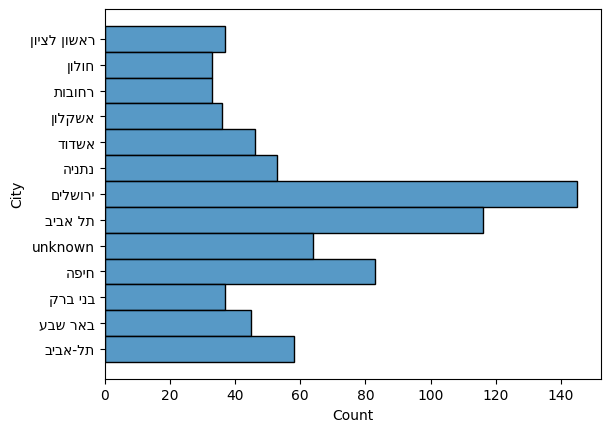

In [43]:
import pandas as pd
from tools import load_conf, save_conf
from IPython.display import display
import seaborn as sns
from bidi import algorithm as bidialg

stores_data = load_conf('conf/all_stores.json')
#df1 = pd.DataFrame(stores_data['7290875100001_001_002'])
#df = pd.read_json('conf/all_stores.json')
first = stores_data[[key for key in stores_data][0]]
columns = [key for key in first]
data = []
for store_key in stores_data:
    row = []
    for col in columns:
        row.append(stores_data[store_key].get(col,None))
    data.append(row)
df1 = pd.DataFrame(data, columns=columns)

df1.fillna("",inplace=True)
df1['City'] = df1['City'].apply(lambda x: bidialg.get_display(x))
count_freq = dict(df1['City'].value_counts())
df1['City_Count'] = df1['City'].map(count_freq)
sns.histplot(df1[df1.City_Count>30], y="City")

#  generate stores_geo.geojson

In [12]:
from parsers.store_df_parser import download_all_stores
from IPython.display import display, clear_output
from ipywidgets import IntProgress, Text
from il_supermarket_scarper.scrappers_factory import ScraperFactory
from tools import load_conf
import geopandas

def drop_duplication(stores):
    columns = list(stores.columns)
    columns.remove('lastupdatedate')
    stores.drop_duplicates(subset=columns, inplace=True)

def prepare_ui():
    max_count = len(ScraperFactory.all_scrapers())
    t = Text(value='Downloading Store Info', disabled=True)
    progress_bar = IntProgress(min=0, max=max_count) # instantiate the bar
    display(t, progress_bar)
    return progress_bar

progress_bar = prepare_ui()
df = download_all_stores(progress_bar)
clear_output()

drop_duplication(df)
num_provider = len(df.provider.unique())
num_chainid = len(df.chainid.unique())
num_storeid = len(df.storeid.unique())
print(num_provider, num_chainid, df.shape[0], num_storeid)
df['unique_storeid'] = df['chainid'] + df['storeid']
df['long_unique_storeid'] = df['chainid'] + '_'+ df['subchainid'] + '_' + df['storeid']
num_u_storeid = len(df['unique_storeid'].unique())
print(num_u_storeid)
#df.city.value_counts()
df.set_index('long_unique_storeid', inplace=True)

df['city'] = df['city'].str.replace('-',' ')
city_name_correction = load_conf('conf/city_name_correction.json')
df.city.replace(city_name_correction, inplace=True)

store_geo = load_conf('conf/store_geo.json')
for key in store_geo:
    (latitude, longitude) = store_geo[key]
    #print(key, latitude, longitude)
    df.loc[key,['lat', 'lng']] = [latitude, longitude]
df.dropna(subset=['storeid'], inplace=True)

df.replace({' ':None,'  ':None,'   ':None,
            'unknown':None, '-':None}, inplace=True)
df.chainname.fillna(df.provider, inplace=True)
df.dropna(inplace=True, subset=['city'])
df.address.fillna(df.city, inplace=True)

print(df.city.value_counts())
gdf = geopandas.GeoDataFrame(
    df, geometry=geopandas.points_from_xy(df.lng, df.lat), crs="EPSG:4326"
)

gdf.drop(columns=['lat','lng'], inplace=True)

gdf.to_file('data/stores_geo.geojson', driver="GeoJSON")
#print(df.chainname.unique())
#print(df.address.value_counts(dropna=False))
#print('\''+str(df.address.value_counts(dropna=False).index[1])+'\'')
df
#df.loc['7290172900007_100_270']

25 26 1869 901
1868
city
תל אביב יפו    182
ירושלים        122
חיפה            70
באר שבע         51
נתניה           42
              ... 
כפר טרומן        1
יקום             1
מושב טל שחר      1
אום אל פחם       1
בקעת הירדן       1
Name: count, Length: 301, dtype: int64


,provider,lastupdatedate,city,subchainid,address,storetype,zipcode,storename,chainname,chainid,storeid,bikoretno,unique_storeid,lat,lng
long_unique_storeid,,,,,,,,,,,,,,,
7290725900003_1_4,ybitan,2023-08-05,אשקלון,1,הפנינים 28,1,863628,אשקלון צפוני,יינות ביתן,7290725900003,4,3,72907259000034,31.665207,34.600949
7290725900003_1_6,ybitan,2023-08-05,אשדוד,1,האורגים 13,1,7760924,אשדוד אורגים,יינות ביתן,7290725900003,6,1,72907259000036,31.811440,34.659650
7290725900003_1_10,ybitan,2023-08-05,כפר סבא,1,השקמה 21,1,4450012,כפר סבא,יינות ביתן,7290725900003,10,0,729072590000310,32.176305,34.933172
7290725900003_1_12,ybitan,2023-08-05,פתח תקווה,1,בר כוכבא 63,1,4922055,פתח תקוה,יינות ביתן,7290725900003,12,8,729072590000312,32.096570,34.885600
7290725900003_1_16,ybitan,2023-08-05,מעלה אדומים,1,צמח השדה 29,1,9853636,מעלה אדומים,יינות ביתן,7290725900003,16,4,729072590000316,31.767350,35.301780
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7290058173198_1_39,ZolVeBegadol,2023-08-05,בית שמש,1,הרב אויירבך 62,1,None,הרב אויירבך בית שמש,"זול ובגדול בע""מ",7290058173198,39,2,729005817319839,31.747041,34.988099
7290058173198_1_40,ZolVeBegadol,2023-08-05,ירושלים,1,יפו 212,1,None,יפו 212,"זול ובגדול בע""מ",7290058173198,40,3,729005817319840,31.788460,35.206460
7290058173198_1_41,ZolVeBegadol,2023-08-05,ירושלים,1,ארץ חפץ 106,1,None,ארץ חפץ,"זול ובגדול בע""מ",7290058173198,41,8,729005817319841,31.794880,35.223470


## create manufactur top 

In [17]:
from parsers.price_parser import download_all_prices
from bidi import algorithm as bidialg

df = download_all_prices()


df['manufacturename_plot'] = df['manufacturename'].astype("string").apply(lambda x: bidialg.get_display(x))
df['manufacturename'].replace({
    'לא ידוע':'Unknown',
    ',':'Unknown',
    ' ':'Unknown',
    'קבוצת אוסם סחר שות.מוגבלת':'קבוצת אוסם סחר-שות.מוגבלת'
}, inplace=True)

df['manufacturename'].fillna(' ', inplace=True)

df['manufacturename'].value_counts().head(10)

manufacturename
Unknown                      3902742
General                       141189
קריות זול                      47491
---                            41338
תנובה                          39391
כללי                           30962
סנו                            29610
אסם                            29309
קבוצת אסם סחר שות. מוגבלת      28149
ש.שסטוביץ בעמ                  22071
Name: count, dtype: int64

<Axes: ylabel='םינרצי'>

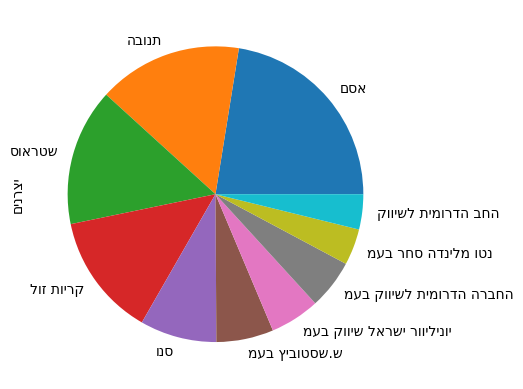

In [62]:


df['manufacturename'].replace({
    'לא ידוע':'Unknown',
    ',':'Unknown',
    ' ':'Unknown',
    '  ':'Unknown',
    '---':'Unknown',
    'קבוצת אסם סחר שות. מוגבלת' 
        :'אסם',
    'קבוצת אוסם סחר-שות.מוגבלת':
        'אסם',
    'כללי':
        'General',
    'שטראוס גרופ בע"מ':
        'שטראוס',
    'תנובה - חלב':
        'תנובה',
    'שטראוס גרופ בעמ/מצונן':
        'שטראוס'
}, inplace=True)


df['manufacturename'].value_counts().head(12).tail(10).to_frame()
df['manufacturename_plot'].value_counts().head(12).tail(10).plot(kind='pie',ylabel=bidialg.get_display('יצרנים'))
#df['manufacturename'].value_counts().index[0:14]